# Critera

Extinction is a chance process. Thus, a listing in a higher extinction risk category implies a higher expectation of extinction, and over the time-frames specified more taxa listed in a higher category are expected to go extinct than those in a lower one (without effective conservation  action).  However,  the  persistence  of  some  taxa  in  high-risk  categories does not necessarily mean their initial assessment was inaccurate.All taxa listed as Critically Endangered qualify for Vulnerable and Endangered, and all listed  as  Endangered  qualify  for  Vulnerable.  Together  these  categories  are  described as ‘threatened’. The threatened categories form a part of the overall scheme. It will be possible to place all taxa into one of the categories (see Figure 1).

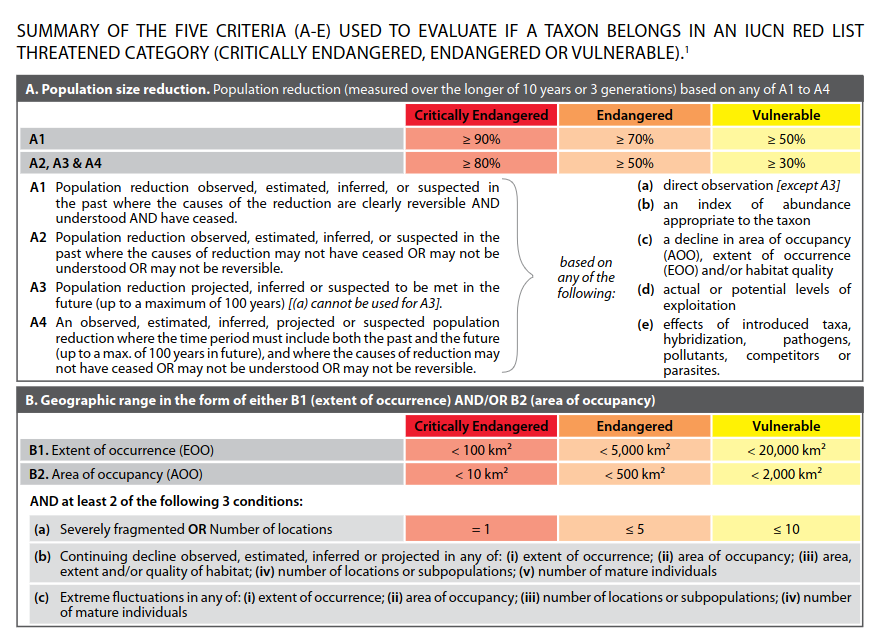
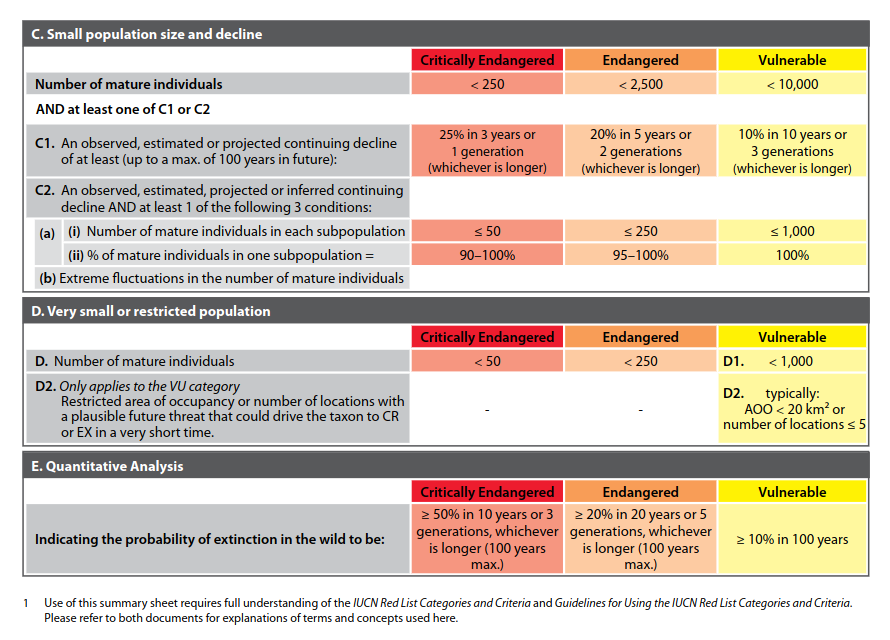



In [1]:
matrix_start <- function(nspecies,population,row) {
    my_matrix <- matrix(sample( 
  1 : nspecies, population, replace = TRUE), nrow = row) # should i use sqrt for rows?
return(my_matrix)
}
my_matrix <- matrix_start(40,400,20)

In [2]:
speciation_fun <- function(matrix,speciation_rate,deadx,deady){
    z <- max(unique(matrix))
    matrix[deadx,deady]= z+1
    return(matrix)
}

spec_test <- matrix_start(10,100,10)
speciation_fun(spec_test,0.5,5,5)

9,5,7,8,4,6,10,7,10,5
2,6,7,6,7,10,4,6,2,2
8,4,8,7,5,4,7,4,10,9
3,8,4,8,7,10,10,1,1,9
4,2,4,2,11,6,10,7,7,6
4,1,7,2,2,3,4,7,1,6
5,4,7,4,6,10,8,9,3,4
1,2,4,6,9,3,7,1,5,9
1,7,9,6,7,5,9,3,1,6
3,9,8,8,3,9,2,9,2,9


In [3]:
replacfun <- function(mat,sd,speciation_rate){    
    deadx <- round(runif(1,1,sqrt(length(mat))))
    deady <- round(runif(1,1,sqrt(length(mat))))
    #print(mat[deadx,deady])
    spec <- runif(1,0,1)
    if(spec > speciation_rate){
    x <- round(rnorm(1, mean = 0, sd = sd))
        #print(x)
    y <- round(rnorm(1, mean = 0, sd = sd))
        #print(y)
    if(sqrt(length(mat)) <= (deadx + x) | (deadx + x) <= 1 | sqrt(length(mat)) <= (deady + y) | (deady + y) <= 1 ){
        
        while(sqrt(length(mat)) <= (deadx + x) | (deadx + x) <= 1 | sqrt(length(mat)) <= (deady + y) | (deady + y) <= 1 ){
            x <- round(rnorm(1, mean = 0, sd = sd))
        #print(x)
        y <- round(rnorm(1, mean = 0, sd = sd))
        #print(y)
            }
            #print(x)
    mat[deadx,deady] <- mat[deadx + x,deady + y]
    #print(mat[deadx,deady])
        
    }else{
    #print(x)
    mat[deadx,deady] <- mat[deadx + x,deady + y]
    #print(mat[deadx,deady])
    }
    return(mat)  
}else{
        mat <- speciation_fun(mat,speciation_rate,deadx,deady)
    }
}


*To do list -*
- write function that uses replacefun over multiple generations (1 generation = 1/2 community dead)
- Function to collate the number of each species reduction in to bins of a certain % acoording to criteria( every 3 years)
- Write a function to make a visualisation og the change every generation (maybe interactive?)


In [4]:
library(ggplot2)
library(reshape)
library(dplyr)
df <- melt(my_matrix)
colnames(df) <- c("x", "y", "value")
ggplot(df,aes(x = x, y = y, fill = value))+
geom_tile()

ERROR: Error in library(reshape): there is no package called ‘reshape’


In [5]:
zerolist <- function(time,n_sp){
    x <- list()
       for (i in 1:n_sp){
        x[i] <- list(rep(0,time))
    } 
    return(x)
}
c <- zerolist(10,5)
c
f <- zerolist(10,28)
f
e <- append(f,c)
e
mat <- table(my_matrix)
x <- names(mat)
x
index <- which(x == 10)
index

[[1]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[2]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[3]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[4]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[5]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[1]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[2]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[3]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[4]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[5]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[6]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[7]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[8]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[9]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[10]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[11]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[12]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[13]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[14]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[15]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[16]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[17]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[18]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[19]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[20]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[21]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[22]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[23]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[24]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[25]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[26]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[27]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[28]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[1]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[2]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[3]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[4]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[5]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[6]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[7]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[8]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[9]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[10]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[11]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[12]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[13]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[14]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[15]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[16]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[17]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[18]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[19]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[20]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[21]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[22]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[23]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[24]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[25]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[26]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[27]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[28]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[29]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[30]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[31]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[32]]
 [1] 0 0 0 0 0 0 0 0 0 0

[[33]]
 [1] 0 0 0 0 0 0 0 0 0 0

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40"

[1] 10

In [6]:
multigensp <- function(time,mat,sd,speciation_rate){
    x <- zerolist(time,length(unique(as.vector(mat))))
    first <- table(mat)
    sp1 <- sort(unique(as.vector(mat)))
          for(k in sp1){
              name <- names(first)
              index <- which(name == k)
          x[[k]][1]<- first[index]
       }
        for(i in 1:time){
        for(j in 1:(length(mat)/2)){
            mat <- replacfun(mat,sd,speciation_rate)
        }
            y <- table(mat)
            sp <- sort(unique(as.vector(mat)))
            if (max(sp) > max(sp1)){
            newsp <- (max(sp) - max(sp1))
            x <- append(x,(zerolist(time,newsp)))
            }
            for(k in sp){
             name <- names(y)
              index <- which(name == k)
          x[[k]][i]<- y[index]# calling table index not the value of sp
                #print(i)
            }
            sp1 <- sp
            }
    return(x)
    }
multigensp(50,my_matrix,4,0.03)

[[1]]
 [1]  8 11 10  8  8 10 14 17 14 17 16 20 17 19 19 13 15 10 12 16 15 15 19 18 15
[26] 19 14 11  7  7  7  9 10 18 14 11 13 14 13 10  5  6  5  7  9  8  6 10  8  7

[[2]]
 [1] 12 11 14 14 18 19 13 15 10 10  7 12 10 12 18 11  8  8 10 12 13 10 13 19 17
[26] 10  8 10 12 15 17 15  9  9  6  4  3  1  1  1  1  1  1  1  0  0  0  0  0  0

[[3]]
 [1] 4 5 5 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[4]]
 [1] 4 4 3 3 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[5]]
 [1] 14  8  5  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[6]]
 [1] 12 10 10 12  7  6  8  8  7  5  2  3  2  2  2  2  1  1  1  1  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[7]]
 [1]  8  8  7 10  8 17 18 16 19 18 18 17 16  8  8  4  4  9  7  9  7  7  9  8 12
[26] 10 18 15 11 12 11 14 17 20 18 17 17 21 20 25 26 21 15 20 18 24 30 32 30 30

[[8]]
 [1] 16  9  7  7  5  7  8  8  5  8  8  4  3  3  8 15 17 15 23 31 33 30 32 38 36
[26] 39 36 33 40 38 29 31 28 15 16 15 10  5  2  2  1  1  0  0  0  0  0  0  0  0

[[9]]
 [1] 5 7 7 4 6 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[10]]
 [1]  7  9  6  4  7  9 17 28 26 16 14 11  8  5  2  3  1  1  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[11]]
 [1] 4 2 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[12]]
 [1]  6  5  7  5  5  5 11 11 20 20 21 21 19 20 18 18 23 20 30 26 23 20 25 23 23
[26] 22  8 11 14 14 16 11  8  5  5  3  3  2  2  1  1  0  0  0  0  0  0  0  0  0

[[13]]
 [1]  8  8 11 13 19 21 20 19 22 22 21 19 24 21 18 18 16 13 16 17 10 14 17  8  8
[26]  9  9 10  7  9  6  7  5  7 10 11 10 10 16 17 14 18 18 13 13  7  5  1  1  0

[[14]]
 [1] 10 12 18 17 13  7  3  3  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[15]]
 [1] 10 13 12 12 13  7  7  8  6  5  5  4  1  1  1  1  1  1  1  1  1  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[16]]
 [1] 14 11 10  6  5  5  3  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[17]]
 [1] 16 14 21 24 12  7  6  3  7  5  5  7  5 10 10 16 16 15 12 12 12  9 10  8  6
[26]  6  6  8  9 12 10 13 15 13 10  4  2  2  1  1  1  1  1  1  1  0  0  0  0  0

[[18]]
 [1] 16 12 10  7  8  4  2  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[19]]
 [1] 4 3 2 2 3 4 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[20]]
 [1] 4 6 5 6 6 4 4 4 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[21]]
 [1] 13 13  9 13 28 29 20 18 17 14 18 21 27 20 26 25 20 22 18 15 11 15 14 13  9
[26]  4  3  3  4  7  5  5  3  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[22]]
 [1] 14 14 12 19 21 18 18 20 18 15 15 11 12 16  8  8  8  5  5  4  5  3  2  1  1
[26]  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[23]]
 [1]  9 12 18 13 10  8  8  5  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[24]]
 [1] 12 11 13 11  9  9  8  7 10 10 15 15 18 15 20 18 17 16 11 13 11 13  9  3  9
[26]  8  9 10  9 13 16 17 17 20 16 15 12  6  8  5  2  2  1  1  1  1  1  1  0  0

[[25]]
 [1] 13 19 14 11  8  5  3  4  7  8  7  6  5  5  3  4  2  2  1  1  1  1  1  1  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[26]]
 [1] 10 10 10 14 13 15 19 24 22 30 30 31 38 31 29 28 24 25 28 25 33 37 42 45 42
[26] 43 38 43 38 31 31

In [7]:
plotfunc <- function(mat){
    df <- melt(mat)
colnames(df) <- c("x", "y", "value")
p <- ggplot(df,aes(x = x, y = y, fill = value))+
geom_tile()
        print(p)

}

dummydat <- multigensp(50,my_matrix,4,0.03)

dummydat

[[1]]
 [1]  9 12 10  7  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[2]]
 [1] 14 13 13 14  9 12 13 14 15 11  9 12 26 37 43 35 27 26 28 30 29 28 26 22 20
[26] 14 18 19 22 19 12  7 10  9 16 14  9  8  7  5  4  4  6  3  2  1  0  0  0  0

[[3]]
 [1] 9 8 9 8 5 5 5 3 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[4]]
 [1]  8  9 12 13  9  6  7  5  6  6  5  5  6  7  8 15 23 33 29 32 38 39 35 40 35
[26] 45 52 46 41 42 48 55 56 54 54 56 49 55 49 55 54 66 58 45 40 52 46 40 40 36

[[5]]
 [1]  8  9  8  7  5  5  3  2  2  2  2  5  4  4  5  7  8 11 10 11 10  8 12  8  3
[26]  3  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0

[[6]]
 [1] 12 10 11  9  7  4  5  7  7  6  6  2  1  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[7]]
 [1]  7  6  9 16 16 18 22 22 25 27 34 46 46 42 37 32 29 25 24 24 22 24 18  9  6
[26]  4  6  4  4  4  8 13 12 17 15  9 10  9 13  9  9 10 15 14 16 20 18 17 21 17

[[8]]
 [1] 12 15 10 13 16 20 21 14 11 10  9  9 13 18 15 12  9  5  4  2  2  4  8 15 12
[26]  8  6  7 19 14 11 14 13 12 16 16 11 17 20 18 14 12 12  9 12  9  4  4  1  0

[[9]]
 [1] 4 5 4 3 1 1 4 4 3 2 5 5 4 5 5 2 3 4 2 1 3 2 1 3 2 1 1 1 1 1 1 1 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[10]]
 [1] 11  8 19 20 20 17 16 17 24 24 28 31 31 25 22 22 13 13 10  9  6  6  2  4  1
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[11]]
 [1] 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[12]]
 [1]  5  3  5  6  5  5  4  3  2  2  3  2  2  3  5 18 19 24 24 24 22 17 25 20 23
[26] 22 13 15 14 20 17 24 25 25 24 27 30 30 30 34 30 38 32 36 32 30 31 27 24 27

[[13]]
 [1] 8 3 7 7 3 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

[[14]]
 [1]  8 13 11  8  9 10  5  3  6  8  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[15]]
 [1] 14 14 18 17 19 20 24 33 26 28 24 24 19 12 14 16 13  8  7  7  4  6  4  5  2
[26]  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[16]]
 [1] 11  7  7  7  3  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[17]]
 [1] 15 20 21 22 24 29 32 35 40 40 44 45 36 38 40 30 25 24 18 13 14 10 10 11 14
[26] 19 19 19 15 14 11 14 12  9 12 14 18 21 18 17 21 18 13 11 14  7  6  3  3  2

[[18]]
 [1] 11 11 11  9  8 11 10 15 16 19 17 15 20 19 16 20 18 13 13 14  9  9  4  2  2
[26]  3  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[19]]
 [1] 13 13  9  9  9  8  9 11  7  7  6  4  3  2  1  1  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[20]]
 [1]  4  4  5  4  6  7  5  5  8 18 23 21 28 28 25 32 40 45 57 60 43 45 35 23 18
[26] 12 15 22 20 21 24 28 24 28 35 36 39 44 51 55 48 33 34 25 23 29 37 34 35 37

[[21]]
 [1] 14 18 16 23 27 31 21 18 17 20 15 14  8  4  4  3  4  4  5  5  6  5  5  6 11
[26] 13 15 15 14  8  7 10 10 10 12 11 14 14 10  7  5  5  6  5  5  3  7 12 18 20

[[22]]
 [1] 11 14 12 16 20 17 16  8  6  2  6  7  8 11 13 10 12  8  1  2  3  7 14 17 23
[26] 25 24 37 35 44 36 37 41 33 31 26 31 22 31 35 43 36 37 42 33 25 23 21 16 23

[[23]]
 [1] 11 10  9  7  9  6  7  7  5  4  3  6 11  9  8  5  4  5  5  8  8 11 15 15 14
[26]  9 12 12 14 16 16 16 15  8 11 10 13 13  8  9  6  5  4  3  6 16 14 13 12 12

[[24]]
 [1] 11  7  3  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[25]]
 [1] 12 10 12 12 13  9  8 11  8  5  3  3  3  3  3  2  2  2  1  1  1  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[26]]
 [

In [11]:

dummydat <- multigensp(50,my_matrix,4,0.03)

# Convert list to dataframe
my_df <- data.frame(do.call(cbind, dummydat))

# Print the dataframe

name <- vector()
for (i in 1:ncol(my_df)){
        name[i] <- paste0("species",i)
    } 
t <- (1:nrow(my_df))
my_df <- cbind(my_df,t)
name[length(name)+1] <- "time"
colnames(my_df) <- name
print(my_df)


   species1 species2 species3 species4 species5 species6 species7 species8
1        13       12        6       10        8       14        5       18
2        10       10        6        7       13       18        9       19
3         8       14        6        7       14       26        8       22
4         6       13       12        7       14       26        6       19
5         7       16       12        5       11       21        7       18
6         8       16       14        5       11       24        7       14
7        10       15       15        3       12       33        7        9
8        11        9       19        3       18       42        3       11
9         8        5       26        2       12       34        1        7
10        9        8       21        2        8       32        2        9
11        9        9       21        4        5       32        1        7
12       15        6       21        3        4       30        0        7
13       14        5     

In [12]:
rm_sp <- function(data){
    df <- data
    df <- df[, sapply(df, function(col) sum(col > 0)) > 3] 
    return(df)
}
 my_df <- rm_sp(my_df)

In [13]:
rm_0 <- function(sp){
    df_new <- sp[sp!=0]
    print(df_new)
}
print(my_df[,1])
rm_0(my_df[,1])

 [1] 13 10  8  6  7  8 10 11  8  9  9 15 14 17 15 21 23 15 16 20 17 21 14 12 16
[26] 13  9  8  7  5  4  2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [1] 13 10  8  6  7  8 10 11  8  9  9 15 14 17 15 21 23 15 16 20 17 21 14 12 16
[26] 13  9  8  7  5  4  2  2  1  1  1


In [10]:
criteria_gen <- function(data,sp_col){
        for(j in 1:(nrow(data)-3)){
            print(j)
            x <- data[j,i]
            print(x)
            
            x_plus_3 <- data[(j+3),i]
            print(x_plus_3)
            abundance_change[j] <- x - x_plus_3
            if(x == x_plus_3){
                percentage_dif <- 0
            } else{
                percentage_dif <- (((x - x_plus_3)/x)*100)
            }
            percentage_change[j] <- percentage_dif
            print(percentage_dif)
            print(j)
            if (percentage_dif <= -90){
                print("critical")
                status [j] <- "critical" 
            } else if (percentage_dif <= -70){
                print("endangered")
                 status [j] <- "endangered" 
        } else if (percentage_dif <= -50){
                print("vulnrable")
                status [j] <- "vulnrable"
        }else{
                print("nochange")
                status[j] <- "no_change"
        }
        }}

In [20]:
criteria_a <- function(data){
    fulldf <- data.frame(rep(0,((nrow(data))-3)))
    for(i in 1:(ncol(data)-1)){
        abundance_change <- c()
        percentage_change <- c()
        status <- c()
        for(j in 1:(nrow(data)-3)){
            # print(j)
            x <- data[j,i]
           # print(x)
            
            x_plus_3 <- data[(j+3),i]
            #print(x_plus_3)
            abundance_change[j] <- x - x_plus_3
            if(x == x_plus_3){
                percentage_dif <- 0
            } else{
                percentage_dif <- (((x - x_plus_3)/x)*100)
            }
            percentage_change[j] <- percentage_dif
            print(percentage_dif)
            print(j)
            if (percentage_dif <= -90){
               # print("critical")
                status [j] <- "critical" 
            } else if (percentage_dif <= -70){
                #print("endangered")
                 status [j] <- "endangered" 
        } else if (percentage_dif <= -50){
                #print("vulnrable")
                status [j] <- "vulnrable"
        } else if (x == 0){
                #print("extinct")
                status [j]<- "extinct"
                } else{
                status[j]<- "least_threatened" # Na caused by first value since no status
                }
        }
        #print(data[,i])
        print(abundance_change)
        #print(status)
        sp <- c(status)
        fulldf[,i] <- sp
        }
     return(fulldf)
    }
roc_dat<- criteria_a(my_df)

[1] 53.84615
[1] 1
[1] 30
[1] 2
[1] 0
[1] 3
[1] -66.66667
[1] 4
[1] -57.14286
[1] 5
[1] 0
[1] 6
[1] 10
[1] 7
[1] 18.18182
[1] 8
[1] -87.5
[1] 9
[1] -55.55556
[1] 10
[1] -88.88889
[1] 11
[1] 0
[1] 12
[1] -50
[1] 13
[1] -35.29412
[1] 14
[1] 0
[1] 15
[1] 23.80952
[1] 16
[1] 13.04348
[1] 17
[1] -13.33333
[1] 18
[1] -31.25
[1] 19
[1] 30
[1] 20
[1] 29.41176
[1] 21
[1] 23.80952
[1] 22
[1] 7.142857
[1] 23
[1] 25
[1] 24
[1] 50
[1] 25
[1] 46.15385
[1] 26
[1] 44.44444
[1] 27
[1] 50
[1] 28
[1] 71.42857
[1] 29
[1] 60
[1] 30
[1] 75
[1] 31
[1] 50
[1] 32
[1] 50
[1] 33
[1] 100
[1] 34
[1] 100
[1] 35
[1] 100
[1] 36
[1] 0
[1] 37
[1] 0
[1] 38
[1] 0
[1] 39
[1] 0
[1] 40
[1] 0
[1] 41
[1] 0
[1] 42
[1] 0
[1] 43
[1] 0
[1] 44
[1] 0
[1] 45
[1] 0
[1] 46
[1] 0
[1] 47
 [1]  7  3  0 -4 -4  0  1  2 -7 -5 -8  0 -7 -6  0  5  3 -2 -5  6  5  5  1  3  8
[26]  6  4  4  5  3  3  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0
[1] -8.333333
[1] 1
[1] -60
[1] 2
[1] -14.28571
[1] 3
[1] -15.38462
[1] 4
[1] 43.75
[1] 5
[1] 68.75
[1

Use criteon c and d build function for that 
    c population numbers instead of percentage of decline so think about neutral theory with groups of values 
    1 generation = 1 year may make changes to make this changable.

 Questions to answer with my project
- do species go extinct in the time periods specified by the criterion
- is there a bias in how species end up in different statuses
- is one criterion responsible for most of the status changes
- The influence of stochasticity in extinction risk and the incorporation of neutral theory into the redlist
coding / output goals
- transtion rate table
- criterion a function output table with
- risk of occurance verses severity of the outcome

In [22]:
library(ggplot2)
library(dplyrstatus_transition_counts <- your_data %>%
  group_by(previous_status = lag(status, default = first(status)), status) %>%
  summarize(count = n()) %>%
  filter(!is.na(previous_status)))

rate_of_change <- function(dat){
    for(i in ncol(dat)){
        status_transition_counts <- dat[i,] %>%
  group_by(previous_status = lag(status, default = first(status)), status) %>%
  summarize(count = n()) %>%
  filter(!is.na(previous_status))
        }
    print(status_transition_counts)
}

rate_of_change(roc_dat)


# Dummy data
x <- LETTERS[1:20]
y <- paste0("var", seq(1,20))
data <- expand.grid(X=x, Y=y)
data$Z <- runif(400, 0, 5)
 print(data)
# Heatmap 
ggplot(data, aes(X, Y, fill= Z)) + 
  geom_tile()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[36mℹ[39m In argument: `previous_status = lag(status, default = first(status))`.
[1mCaused by error:[22m
[33m![39m object 'status' not found


list of lists